# Exp4: 基于K-近邻的车牌号识别

## 一、案例简介

图像的智能处理一直是人工智能领域广受关注的一类技术，代表性的如人脸识别与 CT 肿瘤识别，在人工智能落地的进程中发挥着重要作用。其中车牌号识别作为一个早期应用场景，已经融入日常生活中，为我们提供了诸多便利，在各地的停车场和出入口都能看到它的身影。车牌号识别往往分为字符划分和字符识别两个子任务，本案例我们将关注字符识别的任务，尝试用 K-NN 的方法对分割好的字符图像进行自动识别和转化。

## 二、作业说明

### 基本要求
* 完成数据的读入和表示，将图片表示成向量并和 label 对应上；
* 构建 K-NN 模型（可调库）对测试集中的图片进行预测并计算准确率；
* 分析当 K 取不同值时测试准确率的变化。

### 扩展要求
* 分析不同距离度量方式对模型效果的影响；
* 对比平权和加权 K-NN 的效果；
* 分析训练集大小对测试结果的影响。

## 三、数据概览
本次我们使用已经分割好的车牌图片作为数据集，包括数字 0-9、字母 A-Z（不包含 O 和 I）以及省份简称共 65 个类，编号从 0 到 64。数据已经分成了训练集和测试集，里面的文件夹用 label 编号命名，一个文件夹下的所有图片都属于该文件夹对应的类，每个图片都是 20 * 20 的二值化灰度图。

下面演示一下如何借助 PIL 库将图片转化为向量：

In [5]:
from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片

In [6]:
import numpy as np
pixels = np.array(img)  # 转化为 numpy 矩阵
pixels.shape

(20, 20)

## 四、模型构建

取出lable

In [7]:
import os
def readFileIndex(filepath):
    lables = dict()
    filetype = '.jpg'
    for i in range(0,65):#因为有0-64个类别
        str1 = str(i)
        filepath1 = os.path.join(filepath,str1)#读取文件夹
        for root,dirs,files in os.walk(filepath1):
            for j in files:
                if filetype+' 'in j+' ':
                    str1 = str(i)+'/'+j
                    lables[str1] = i
    return lables

读取图片，将二维数据转为一维

In [8]:
def readPict(path):
    returanVec=np.zeros(399)
    img = Image.open(path)
    pixel = np.array(img)
    for i in range(19):
        for j in range(19):
            returanVec[i*19+j]=pixel[i][j]
    return returanVec

In [9]:
def readFileContent(lables,flag):
    X = []
    Y = []
    for lableName in lables:#取出每一个路径进行读取
        filename = lableName
        if(flag == 1):#判断是训练集文件夹还是测试集文件夹
            pict = readPict('./data/test/' + filename)
        else:
            pict = readPict('./data/train/' + filename)
        X.append(pict)
        Y.append(lables[filename])
    return X,Y

In [10]:
Lables_train = readFileIndex('./data/train')
Lables_test = readFileIndex('./data/test')
X_train,Y_train = readFileContent(Lables_train, 0)
X_test,Y_test = readFileContent(Lables_test, 1)

In [11]:
from datetime import datetime
from this import s
from sklearn.neighbors import KNeighborsClassifier
S = []
N = []
for i in range(1,65):    
    start = datetime.now()
    neigh = KNeighborsClassifier(weights = 'distance',algorithm="kd_tree", n_neighbors = i)
    neigh.fit(X_train,Y_train)
    end = datetime.now()
    print(end- start)
    N.append(i)
    S.append(neigh.score(X_test,Y_test))

0:00:00.965630
0:00:00.953560
0:00:00.932379
0:00:01.082945
0:00:01.065586
0:00:01.022102
0:00:00.975385
0:00:00.961586
0:00:00.944390
0:00:00.937812
0:00:00.958001
0:00:00.946283
0:00:00.940935
0:00:00.937168
0:00:00.948345
0:00:00.938119
0:00:00.938458
0:00:00.940322
0:00:00.945447
0:00:00.950407
0:00:00.947345
0:00:00.939324
0:00:00.951013
0:00:00.934959
0:00:00.941799
0:00:00.940619
0:00:00.942663
0:00:00.945335
0:00:00.939614
0:00:00.940947
0:00:00.920778
0:00:00.937484
0:00:00.934945
0:00:00.936572
0:00:00.945139
0:00:00.943352
0:00:00.940339
0:00:00.936063
0:00:00.943053
0:00:00.942089
0:00:00.936364
0:00:00.932668
0:00:00.942890
0:00:00.932347
0:00:00.946895
0:00:00.934807
0:00:00.945125
0:00:00.941123
0:00:00.936518
0:00:00.939752
0:00:00.943123
0:00:00.946326
0:00:00.968026
0:00:00.947752
0:00:00.946229
0:00:00.930183
0:00:00.942028
0:00:00.928807
0:00:00.940439
0:00:00.929078
0:00:00.935239
0:00:00.940706
0:00:00.940144
0:00:00.935524


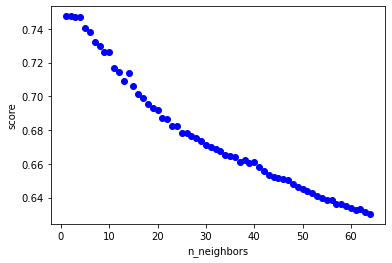

In [12]:
from matplotlib import pyplot as plt
x = N
y = S
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(x,y,"ob")
plt.show()

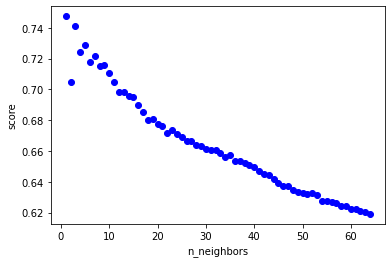

In [13]:
S = []
N = []
for i in range(1,65):    
    neigh = KNeighborsClassifier(weights = 'uniform', algorithm="kd_tree",n_neighbors = i)
    neigh.fit(X_train,Y_train)
    N.append(i)
    S.append(neigh.score(X_test,Y_test))

x = N
y = S
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(x,y,"ob")
plt.show()